**Declarar librerías**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Leer archivo csv**

In [ ]:
df = pd.read_csv('/content/Data desempleo_95.csv')

**Exploración de datos**

In [ ]:
#Tamaño del dataframe
print('Tamaño del dataframe')
print('(filas, columnas) =',df.shape)
print(df.size,' registros')

Tamaño del dataframe
(filas, columnas) = (116, 2)
232  registros


In [ ]:
#Información básica del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tasa de desempleo  116 non-null    float64
 1   Trimestre          116 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
#Primeras 10 filas
df.head(10)

,Tasa de desempleo,Trimestre
0,7.3,Q1 1995
1,7.7,Q2 1995
2,7.6,Q3 1995
3,6.6,Q4 1995
4,6.6,Q1 1996
5,6.6,Q2 1996
6,6.8,Q3 1996
7,5.4,Q4 1996
8,5.8,Q1 1997
9,6.6,Q2 1997


In [ ]:
#Descripción estadística de las variables cuantitativas
df.describe()

,Tasa de desempleo
count,116.000000
mean,8.039310
std,1.478712
min,5.300000
25%,6.895000
50%,7.695000
75%,8.940000
max,12.590000


In [ ]:
#Valores repetidos para la columna type
df.value_counts(df['Tasa de desempleo'])

Tasa de desempleo
6.60     5
7.49     4
7.80     3
8.20     3
6.80     3
        ..
7.32     1
7.30     1
7.28     1
7.27     1
12.59    1
Name: count, Length: 95, dtype: int64

**Gráficos**

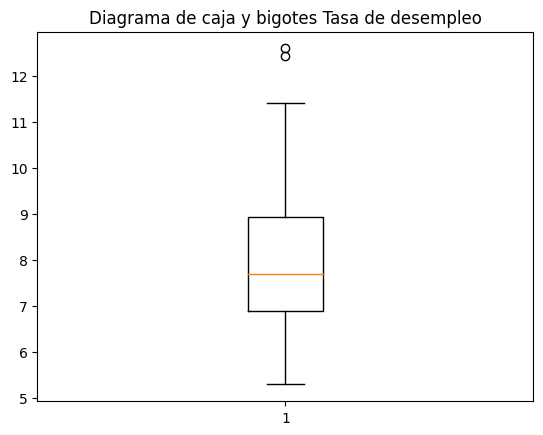

In [ ]:
#1 solo Boxplot
# Con fig, ax
fig, ax=plt.subplots()
ax.boxplot(df['Tasa de desempleo'])
ax.set_title('Diagrama de caja y bigotes Tasa de desempleo')
plt.show()

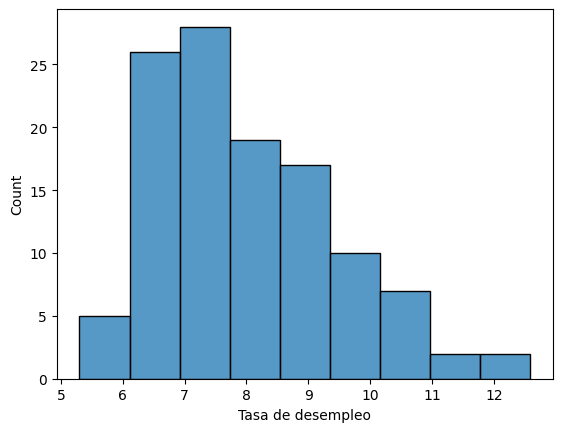

In [ ]:
import seaborn as sns
#Histograma bonito
sns.histplot(df['Tasa de desempleo'])
plt.show()

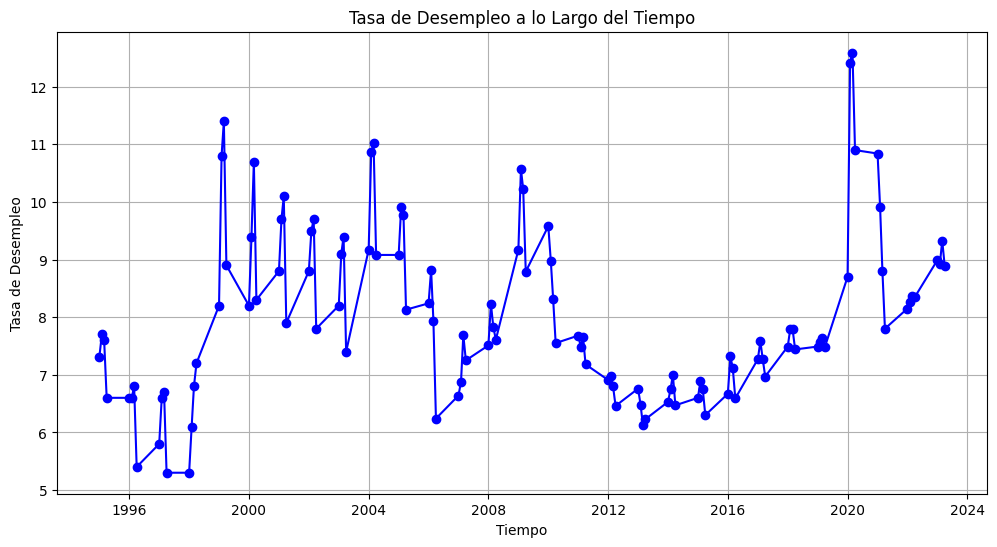

In [ ]:
# Crear un nuevo DataFrame df3
df3 = df.copy()

# Convertir los trimestres en un índice de tiempo (datetime) en df3
df3['Trimestre'] = pd.to_datetime(df3['Trimestre'].str.replace('Q', '').str.split().str.join('-'), format='%m-%Y')

# Ordenar df3 por el índice de tiempo
df3 = df3.sort_values('Trimestre')

# Graficar la tasa de desempleo a lo largo del tiempo usando df3
plt.figure(figsize=(12, 6))
plt.plot(df3['Trimestre'], df3['Tasa de desempleo'], marker='o', linestyle='-', color='b')
plt.title('Tasa de Desempleo a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de Desempleo')
plt.grid(True)
plt.show()

In [ ]:
# Definir los límites de los estados
bins = [5, 6, 6.5, 7, 7.5, 8, 9, 10, 12, 13]
labels = ['[5-6)', '[6-6.5)', '[6.5-7)', '[7-7.5)', '[7.5-8)', '[8-9)', '[9-10)', '[10-12)', '[12-13]']

# Discretizar la tasa de desempleo en estados
df['State'] = pd.cut(df['Tasa de desempleo'], bins=bins, labels=labels, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels), len(labels))), index=labels, columns=labels)

# Contar las transiciones
for i in range(len(df) - 1):
    current_state = df.loc[i, 'State']
    next_state = df.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
         [5-6)  [6-6.5)  [6.5-7)  [7-7.5)  [7.5-8)  [8-9)  [9-10)  [10-12)  \
[5-6)      2.0      1.0      1.0      0.0      0.0    0.0     0.0      0.0   
[6-6.5)    0.0      2.0      6.0      0.0      0.0    0.0     0.0      0.0   
[6.5-7)    2.0      3.0     10.0      5.0      1.0    0.0     0.0      0.0   
[7-7.5)    0.0      1.0      3.0      2.0      6.0    2.0     1.0      0.0   
[7.5-8)    0.0      1.0      1.0      6.0      5.0    4.0     1.0      0.0   
[8-9)      0.0      0.0      0.0      0.0      4.0   10.0     6.0      1.0   
[9-10)     0.0      0.0      0.0      1.0      1.0    4.0     5.0      4.0   
[10-12)    0.0      0.0      0.0      0.0      1.0    3.0     2.0      4.0   
[12-13]    0.0      0.0      0.0      0.0      0.0    0.0     0.0      1.0   

         [12-13]  
[5-6)        0.0  
[6-6.5)      0.0  
[6.5-7)      0.0  
[7-7.5)      0.0  
[7.5-8)      0.0  
[8-9)        1.0  
[9-10)       0.0  
[10-12)      0.0  
[12-13]      1.0  
Matriz 

# **Inflación**

In [ ]:
df1 = pd.read_csv('/content/Data Inflación_95.csv')

In [ ]:
#Tamaño del dataframe
print('Tamaño del dataframe')
print('(filas, columnas) =',df1.shape)
print(df1.size,' registros')

Tamaño del dataframe
(filas, columnas) = (117, 2)
234  registros


In [ ]:
#Información básica del dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inflación  117 non-null    float64
 1   Trimestre  117 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
#Primeras 10 filas
df1.head(10)

,Inflación,Trimestre
0,1.57,Q1 1995
1,1.85,Q2 1995
2,2.85,Q3 1995
3,1.87,Q4 1995
4,1.08,Q1 1996
5,2.37,Q2 1996
6,1.29,Q3 1996
7,1.58,Q4 1996
8,1.55,Q1 1997
9,1.05,Q2 1997


In [ ]:
#Descripción estadística de las variables cuantitativas
df1.describe()

,Inflación
count,117.000000
mean,1.004359
std,0.869081
min,-2.440000
25%,0.590000
50%,0.960000
75%,1.370000
max,3.890000


In [ ]:
#Valores repetidos para la columna type
df1.value_counts(df1['Inflación'])

Inflación
1.03    3
0.98    3
0.78    3
0.69    3
1.59    3
       ..
0.66    1
0.65    1
0.61    1
0.53    1
3.89    1
Name: count, Length: 93, dtype: int64

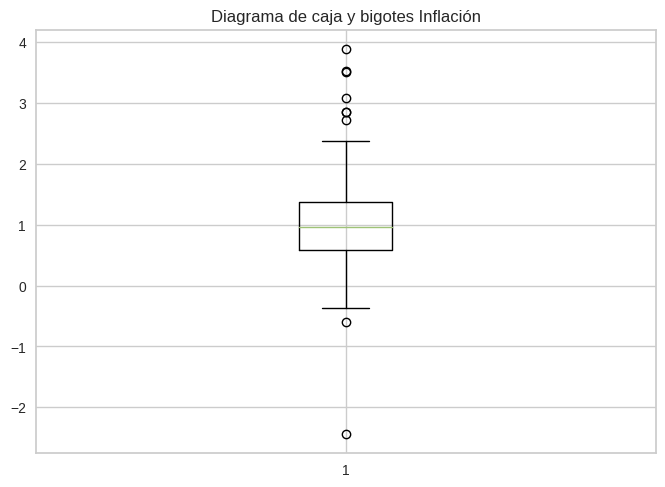

In [ ]:
#1 solo Boxplot
# Con fig, ax
fig, ax=plt.subplots()
ax.boxplot(df1['Inflación'])
ax.set_title('Diagrama de caja y bigotes Inflación')
plt.show()

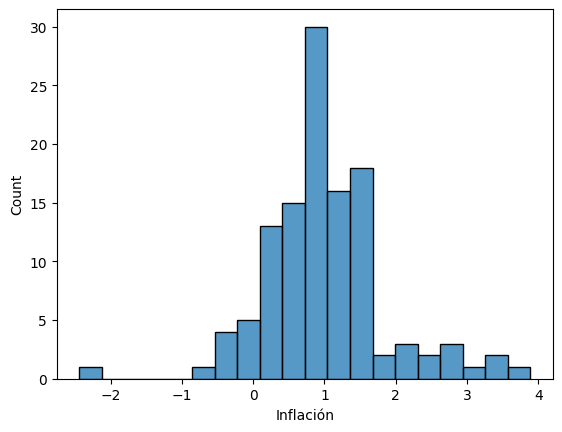

In [ ]:
import seaborn as sns
#Histograma bonito
sns.histplot(df1['Inflación'])
plt.show()

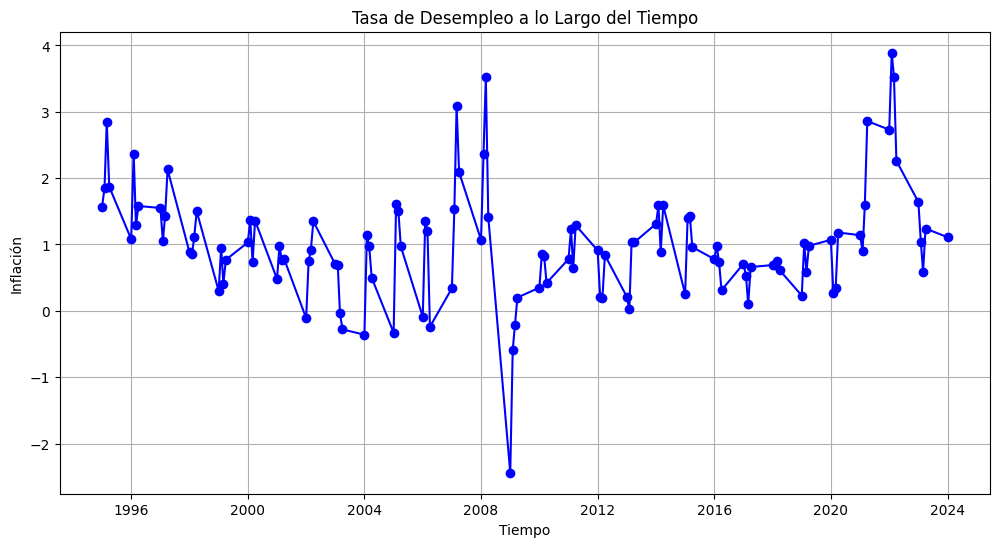

In [ ]:
df4 = df1.copy()

# Convertir los trimestres en un índice de tiempo (datetime) en df4
df4['Trimestre'] = pd.to_datetime(df4['Trimestre'].str.replace('Q', '').str.split().str.join('-'), format='%m-%Y')

# Ordenar df4 por el índice de tiempo
df4 = df4.sort_values('Trimestre')

# Graficar la tasa de desempleo a lo largo del tiempo usando df4
plt.figure(figsize=(12, 6))
plt.plot(df4['Trimestre'], df4['Inflación'], marker='o', linestyle='-', color='b')
plt.title('Tasa de Desempleo a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Inflación')
plt.grid(True)
plt.show()

In [ ]:
# Definir los límites de los estados
bins1 = [-3, -1, 0, 0.5, 1, 1.5, 2, 3, 4]
labels1 = ['[-3-1)', '[-1-0)', '[0-0.5)', '[0.5-1)', '[1-1.5)', '[1.5-2)', '[2-3)', '[3-4)']

# Discretizar la tasa de desempleo en estados
df1['State'] = pd.cut(df1['Inflación'], bins=bins1, labels=labels1, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels1), len(labels1))), index=labels1, columns=labels1)

# Contar las transiciones
for i in range(len(df1) - 1):
    current_state = df1.loc[i, 'State']
    next_state = df1.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
         [-3-1)  [-1-0)  [0-0.5)  [0.5-1)  [1-1.5)  [1.5-2)  [2-3)  [3-4)
[-3-1)      0.0     1.0      0.0      0.0      0.0      0.0    0.0    0.0
[-1-0)      0.0     3.0      2.0      1.0      2.0      1.0    0.0    0.0
[0-0.5)     0.0     0.0      4.0      8.0      4.0      1.0    0.0    0.0
[0.5-1)     0.0     4.0      7.0     16.0      8.0      2.0    0.0    0.0
[1-1.5)     1.0     1.0      2.0      9.0      8.0      3.0    3.0    0.0
[1.5-2)     0.0     0.0      2.0      2.0      3.0      3.0    2.0    1.0
[2-3)       0.0     0.0      0.0      1.0      2.0      2.0    1.0    2.0
[3-4)       0.0     0.0      0.0      0.0      1.0      0.0    2.0    1.0
Matriz de Transición:
           [-3-1)    [-1-0)   [0-0.5)   [0.5-1)   [1-1.5)   [1.5-2)     [2-3)  \
[-3-1)   0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
[-1-0)   0.000000  0.333333  0.222222  0.111111  0.222222  0.111111  0.000000   
[0-0.5)  0.000000  0.000000  0.235294  0.470588

In [ ]:
# Convertir los trimestres en un índice de tiempo (datetime)
df1['Trimestre'] = pd.to_datetime(df['Trimestre'].str.replace('Q', '').str.split().str.join('-'), format='%m-%Y')

# Ordenar por el índice de tiempo
df1 =1 df.sort_values('Trimestre')

# Graficar la tasa de desempleo a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Trimestre'], df['Tasa de desempleo'], marker='o', linestyle='-', color='b')
plt.title('Tasa de Desempleo a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de Desempleo')
plt.grid(True)
plt.show()

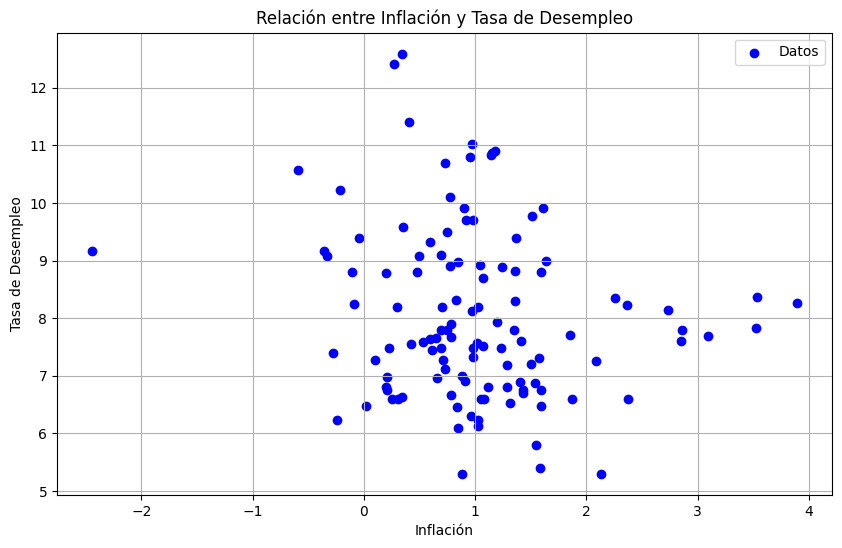

In [ ]:


df_combinado = pd.merge(df4, df3, on='Trimestre')

# Graficar la relación entre inflación y desempleo
plt.figure(figsize=(10, 6))
plt.scatter(df_combinado['Inflación'], df_combinado['Tasa de desempleo'], color='b', label='Datos')
plt.title('Relación entre Inflación y Tasa de Desempleo')
plt.xlabel('Inflación')
plt.ylabel('Tasa de Desempleo')
plt.legend()
plt.grid(True)
plt.show()

## K-MEANS

In [ ]:
#Librería K-Means
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importamos librería K-Means
from sklearn.cluster import KMeans

#Importamos una nueva librería: Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Inflación

In [ ]:
X = df1['Inflación'].values.reshape(-1, 1)  # Reshape para hacerlo un array 2D adecuado para K-means

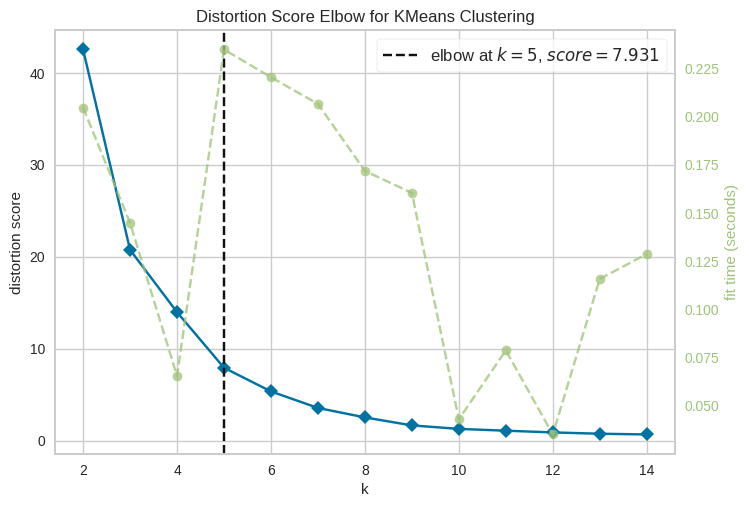

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

# Creando el modelo KMeans con un estado aleatorio para reproducibilidad
modelo = KMeans(random_state=1)

# Instanciando el visualizador KElbowVisualizer con el rango de k que deseas explorar
visualizer = KElbowVisualizer(modelo, k=(2,15))

# Ajustando el modelo con los datos
visualizer.fit(X)  # Ajuste con los datos formateados adecuadamente
visualizer.show()  # Mostrar el gráfico del codo

# n_clusters=3

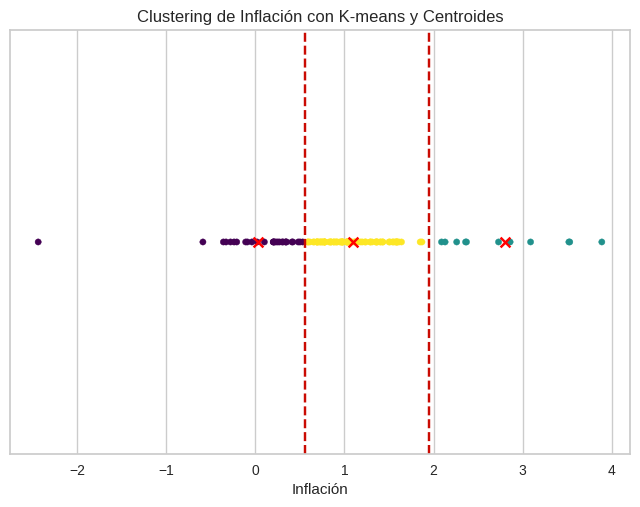

(array([[0.0337931 ],
        [2.80666667],
        [1.09013158]]),
 array([0.56196234, 1.94839912]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(X, [0]*len(X), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Inflación')
plt.yticks([])
plt.title('Clustering de Inflación con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins1 = [-3, 0.56, 1.94, 4]
labels1 = ['[-3-0.56)', '[0.56-1.94)', '[1.94-4)']

# Discretizar la tasa de desempleo en estados
df1['State'] = pd.cut(df1['Inflación'], bins=bins1, labels=labels1, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels1), len(labels1))), index=labels1, columns=labels1)

# Contar las transiciones
for i in range(len(df1) - 1):
    current_state = df1.loc[i, 'State']
    next_state = df1.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
             [-3-0.56)  [0.56-1.94)  [1.94-4)
[-3-0.56)         12.0         17.0       0.0
[0.56-1.94)       17.0         52.0       6.0
[1.94-4)           0.0          6.0       6.0
Matriz de Transición:
             [-3-0.56)  [0.56-1.94)  [1.94-4)
[-3-0.56)     0.413793     0.586207      0.00
[0.56-1.94)   0.226667     0.693333      0.08
[1.94-4)      0.000000     0.500000      0.50


# n_clusters=4

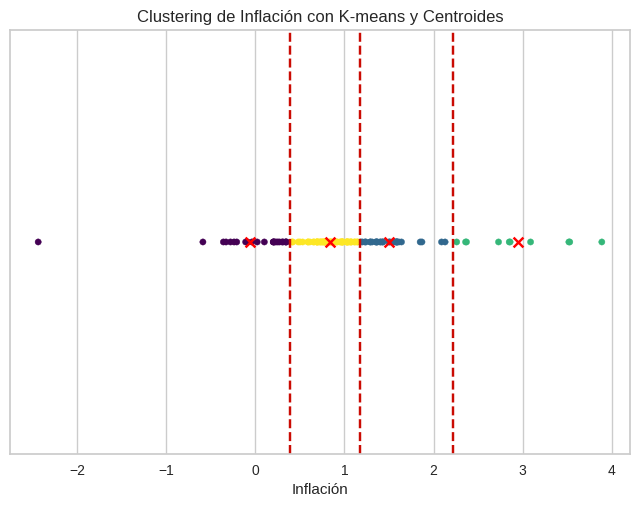

(array([[-0.05666667],
        [ 1.502     ],
        [ 2.946     ],
        [ 0.83679245]]),
 array([0.39006289, 1.16939623, 2.224     ]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(X, [0]*len(X), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Inflación')
plt.yticks([])
plt.title('Clustering de Inflación con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins1 = [-3, 0.39, 1.16, 2.22, 4]
labels1 = ['[-3-0.39)', '[0.39-1.16)', '[1.16-2.22)', '[2.22-4)']

# Discretizar la tasa de desempleo en estados
df1['State'] = pd.cut(df1['Inflación'], bins=bins1, labels=labels1, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels1), len(labels1))), index=labels1, columns=labels1)

# Contar las transiciones
for i in range(len(df1) - 1):
    current_state = df1.loc[i, 'State']
    next_state = df1.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
             [-3-0.39)  [0.39-1.16)  [1.16-2.22)  [2.22-4)
[-3-0.39)         10.0          9.0          5.0       0.0
[0.39-1.16)       10.0         29.0         11.0       2.0
[1.16-2.22)        4.0         15.0          8.0       3.0
[2.22-4)           0.0          0.0          5.0       5.0
Matriz de Transición:
             [-3-0.39)  [0.39-1.16)  [1.16-2.22)  [2.22-4)
[-3-0.39)     0.416667     0.375000     0.208333  0.000000
[0.39-1.16)   0.192308     0.557692     0.211538  0.038462
[1.16-2.22)   0.133333     0.500000     0.266667  0.100000
[2.22-4)      0.000000     0.000000     0.500000  0.500000


# n_clusters=5

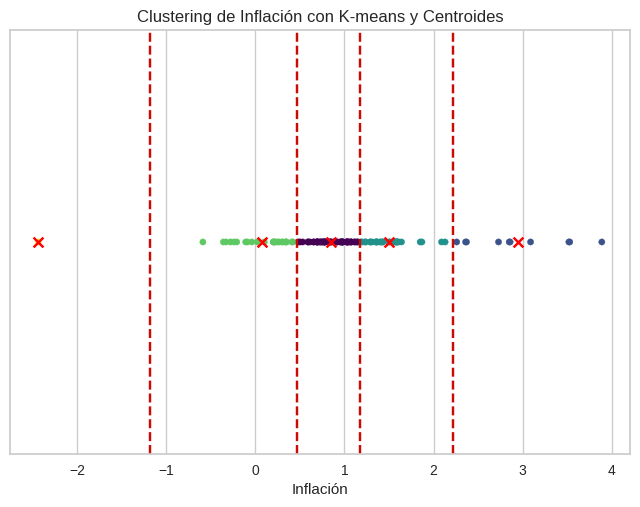

(array([[ 0.85333333],
        [ 2.946     ],
        [ 1.502     ],
        [ 0.0764    ],
        [-2.44      ]]),
 array([-1.1818    ,  0.46486667,  1.17766667,  2.224     ]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(X, [0]*len(X), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Inflación')
plt.yticks([])
plt.title('Clustering de Inflación con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins1 = [-3, -1.18, 0.46, 1.17, 2.22, 4]
labels1 = ['[-3-1.18)', '[-1.18-0.46)', '[0.46-1.17)', '[1.17-2.22)', '[2.22-4)']

# Discretizar la tasa de desempleo en estados
df1['State'] = pd.cut(df1['Inflación'], bins=bins1, labels=labels1, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels1), len(labels1))), index=labels1, columns=labels1)

# Contar las transiciones
for i in range(len(df1) - 1):
    current_state = df1.loc[i, 'State']
    next_state = df1.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
              [-3-1.18)  [-1.18-0.46)  [0.46-1.17)  [1.17-2.22)  [2.22-4)
[-3-1.18)           0.0           1.0          0.0          0.0       0.0
[-1.18-0.46)        0.0           9.0         11.0          5.0       0.0
[0.46-1.17)         0.0          12.0         25.0         11.0       2.0
[1.17-2.22)         1.0           3.0         15.0          8.0       3.0
[2.22-4)            0.0           0.0          0.0          5.0       5.0
Matriz de Transición:
              [-3-1.18)  [-1.18-0.46)  [0.46-1.17)  [1.17-2.22)  [2.22-4)
[-3-1.18)      0.000000          1.00         0.00     0.000000      0.00
[-1.18-0.46)   0.000000          0.36         0.44     0.200000      0.00
[0.46-1.17)    0.000000          0.24         0.50     0.220000      0.04
[1.17-2.22)    0.033333          0.10         0.50     0.266667      0.10
[2.22-4)       0.000000          0.00         0.00     0.500000      0.50


# n_clusters=6

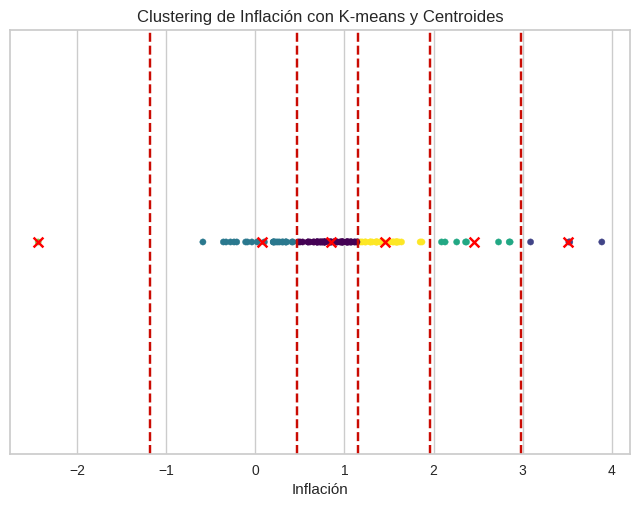

(array([[ 0.85333333],
        [ 3.5075    ],
        [ 0.0764    ],
        [ 2.45625   ],
        [-2.44      ],
        [ 1.45857143]]),
 array([-1.1818    ,  0.46486667,  1.15595238,  1.95741071,  2.981875  ]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(X, [0]*len(X), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Inflación')
plt.yticks([])
plt.title('Clustering de Inflación con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins1 = [-3, -1.18, 0.46, 1.15, 1.95, 2.98, 4]
labels1 = ['[-3-1.18)', '[-1.18-0.46)', '[0.46-1.15)', '[1.15-1.95)', '[1.95-2.98)', '[2.98-4)']

# Discretizar la tasa de desempleo en estados
df1['State'] = pd.cut(df1['Inflación'], bins=bins1, labels=labels1, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels1), len(labels1))), index=labels1, columns=labels1)

# Contar las transiciones
for i in range(len(df1) - 1):
    current_state = df1.loc[i, 'State']
    next_state = df1.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
              [-3-1.18)  [-1.18-0.46)  [0.46-1.15)  [1.15-1.95)  [1.95-2.98)  \
[-3-1.18)           0.0           1.0          0.0          0.0          0.0   
[-1.18-0.46)        0.0           9.0         10.0          6.0          0.0   
[0.46-1.15)         0.0          12.0         24.0         11.0          2.0   
[1.15-1.95)         1.0           3.0         14.0          7.0          3.0   
[1.95-2.98)         0.0           0.0          2.0          3.0          1.0   
[2.98-4)            0.0           0.0          0.0          1.0          2.0   

              [2.98-4)  
[-3-1.18)          0.0  
[-1.18-0.46)       0.0  
[0.46-1.15)        0.0  
[1.15-1.95)        1.0  
[1.95-2.98)        2.0  
[2.98-4)           1.0  
Matriz de Transición:
              [-3-1.18)  [-1.18-0.46)  [0.46-1.15)  [1.15-1.95)  [1.95-2.98)  \
[-3-1.18)      0.000000      1.000000     0.000000     0.000000     0.000000   
[-1.18-0.46)   0.000000      0.360000     0.400000     0.240

# Desempleo

In [ ]:
Y = df['Tasa de desempleo'].values.reshape(-1, 1)  # Reshape para hacerlo un array 2D adecuado para K-means

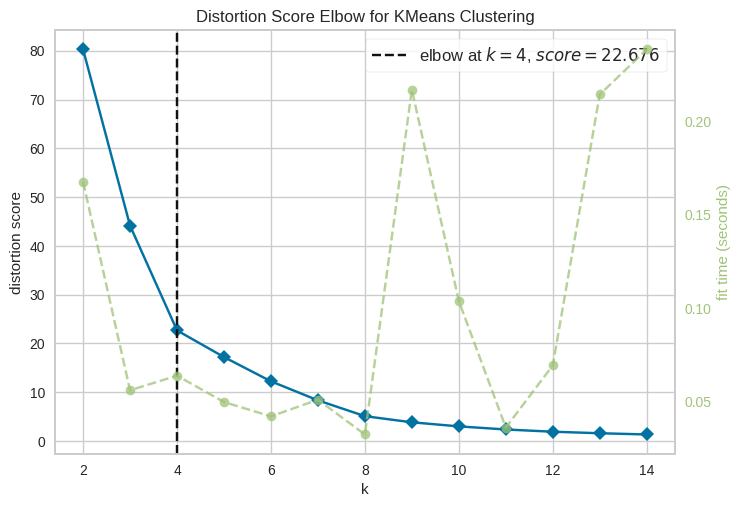

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Creando el modelo KMeans con un estado aleatorio para reproducibilidad
modelo = KMeans(random_state=1)

# Instanciando el visualizador KElbowVisualizer con el rango de k que deseas explorar
visualizer = KElbowVisualizer(modelo, k=(2,15))

# Ajustando el modelo con los datos
visualizer.fit(Y)  # Ajuste con los datos formateados adecuadamente
visualizer.show()  # Mostrar el gráfico del codo

# n_clusters=3

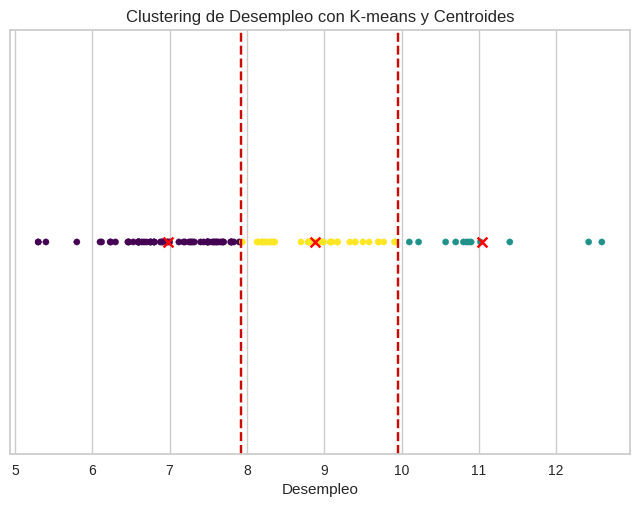

(array([[ 6.98523077],
        [11.03583333],
        [ 8.87410256]]),
 array([7.92966667, 9.95496795]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(Y)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(Y, [0]*len(Y), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Desempleo')
plt.yticks([])
plt.title('Clustering de Desempleo con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins = [5, 7.9, 9.9, 13]
labels = ['[5-7.9)', '[7.9-9.9)', '[9.9-13)']

# Discretizar la tasa de desempleo en estados
df['State'] = pd.cut(df['Tasa de desempleo'], bins=bins, labels=labels, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels), len(labels))), index=labels, columns=labels)

# Contar las transiciones
for i in range(len(df) - 1):
    current_state = df.loc[i, 'State']
    next_state = df.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
           [5-7.9)  [7.9-9.9)  [9.9-13)
[5-7.9)       57.0        7.0       0.0
[7.9-9.9)      6.0       24.0       7.0
[9.9-13)       0.0        7.0       7.0
Matriz de Transición:
            [5-7.9)  [7.9-9.9)  [9.9-13)
[5-7.9)    0.890625   0.109375  0.000000
[7.9-9.9)  0.162162   0.648649  0.189189
[9.9-13)   0.000000   0.500000  0.500000


# n_clusters=4

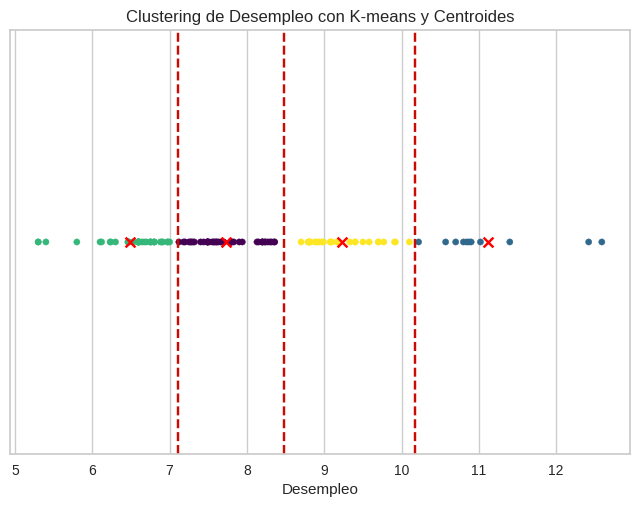

(array([[ 7.73431818],
        [11.12090909],
        [ 6.48882353],
        [ 9.23333333]]),
 array([ 7.11157086,  8.48382576, 10.17712121]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(Y)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(Y, [0]*len(Y), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Desempleo')
plt.yticks([])
plt.title('Clustering de Desempleo con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins = [5, 7.1, 8.48, 10.17, 13]
labels = ['[5-7.1)', '[7.1-8.48)', '[8.48-10.17)', '[10.17-13]']

# Discretizar la tasa de desempleo en estados
df['State'] = pd.cut(df['Tasa de desempleo'], bins=bins, labels=labels, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels), len(labels))), index=labels, columns=labels)

# Contar las transiciones
for i in range(len(df) - 1):
    current_state = df.loc[i, 'State']
    next_state = df.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
              [5-7.1)  [7.1-8.48)  [8.48-10.17)  [10.17-13]
[5-7.1)          29.0         5.0           0.0         0.0
[7.1-8.48)        5.0        29.0           9.0         1.0
[8.48-10.17)      0.0         8.0          14.0         4.0
[10.17-13]        0.0         1.0           4.0         6.0
Matriz de Transición:
               [5-7.1)  [7.1-8.48)  [8.48-10.17)  [10.17-13]
[5-7.1)       0.852941    0.147059      0.000000    0.000000
[7.1-8.48)    0.113636    0.659091      0.204545    0.022727
[8.48-10.17)  0.000000    0.307692      0.538462    0.153846
[10.17-13]    0.000000    0.090909      0.363636    0.545455


# n_clusters=5

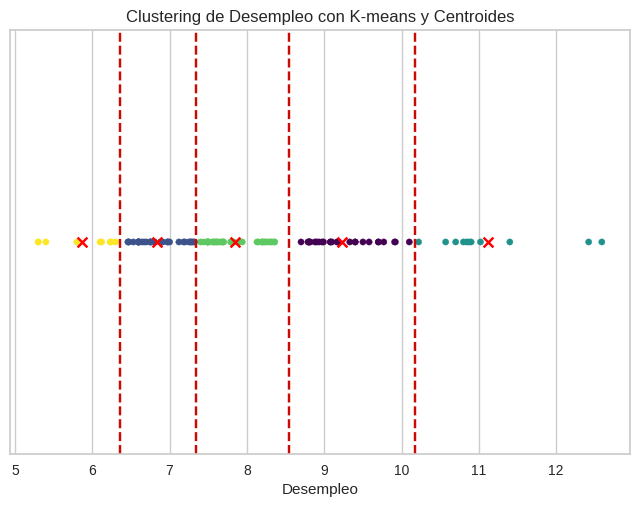

(array([[ 9.23333333],
        [ 6.84090909],
        [11.12090909],
        [ 7.84416667],
        [ 5.86555556]]),
 array([ 6.35323232,  7.34253788,  8.53875   , 10.17712121]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(Y)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(Y, [0]*len(Y), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Desempleo')
plt.yticks([])
plt.title('Clustering de Desempleo con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins = [5, 6.35, 7.34, 8.53, 10.17, 13]
labels = ['[5-6.35)', '[6.35-7.34)', '[7.34-8.53)', '[8.53-10.17)', '[10.17-13)']

# Discretizar la tasa de desempleo en estados
df['State'] = pd.cut(df['Tasa de desempleo'], bins=bins, labels=labels, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels), len(labels))), index=labels, columns=labels)

# Contar las transiciones
for i in range(len(df) - 1):
    current_state = df.loc[i, 'State']
    next_state = df.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
              [5-6.35)  [6.35-7.34)  [7.34-8.53)  [8.53-10.17)  [10.17-13)
[5-6.35)           4.0          5.0          0.0           0.0         0.0
[6.35-7.34)        4.0         23.0          6.0           0.0         0.0
[7.34-8.53)        1.0          4.0         21.0           9.0         1.0
[8.53-10.17)       0.0          0.0          8.0          14.0         4.0
[10.17-13)         0.0          0.0          1.0           4.0         6.0
Matriz de Transición:
              [5-6.35)  [6.35-7.34)  [7.34-8.53)  [8.53-10.17)  [10.17-13)
[5-6.35)      0.444444     0.555556     0.000000      0.000000    0.000000
[6.35-7.34)   0.121212     0.696970     0.181818      0.000000    0.000000
[7.34-8.53)   0.027778     0.111111     0.583333      0.250000    0.027778
[8.53-10.17)  0.000000     0.000000     0.307692      0.538462    0.153846
[10.17-13)    0.000000     0.000000     0.090909      0.363636    0.545455


# n_clusters=6

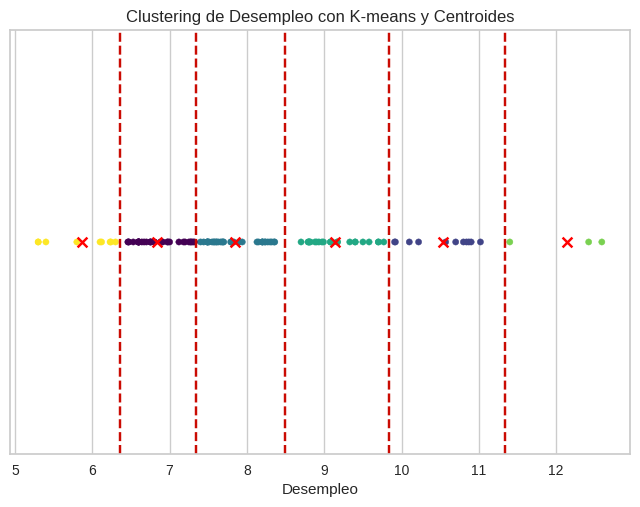

(array([[ 6.84090909],
        [10.53181818],
        [ 7.84416667],
        [ 9.14041667],
        [12.13666667],
        [ 5.86555556]]),
 array([ 6.35323232,  7.34253788,  8.49229167,  9.83611742, 11.33424242]))

In [ ]:
# Definiendo y ajustando el modelo K-means
kmeans = KMeans(n_clusters=6)
kmeans.fit(Y)

# Obteniendo los centroides
centroids = kmeans.cluster_centers_

# Ordenando los centroides
sorted_centroids = np.sort(centroids.flatten())

# Calculando los límites aproximados entre los clusters
limits = (sorted_centroids[:-1] + sorted_centroids[1:]) / 2

# Visualizando los resultados
plt.scatter(Y, [0]*len(Y), c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(centroids, [0]*len(centroids), c='red', s=50, marker='x')  # Marcando los centroides
for limit in limits:
    plt.axvline(x=limit, color='r', linestyle='--')  # Líneas para los límites aproximados
plt.xlabel('Desempleo')
plt.yticks([])
plt.title('Clustering de Desempleo con K-means y Centroides')
plt.show()

# Imprimiendo los centroides y los límites
centroids, limits

In [ ]:
# Definir los límites de los estados
bins = [5, 6.35, 7.34, 8.49, 9.83, 11.33, 13]
labels = ['[5-6.35)', '[6.35-7.34)', '[7.34-8.49)', '[8.49-9.83)', '[9.83-11.33)', '[11.33-13)']

# Discretizar la tasa de desempleo en estados
df['State'] = pd.cut(df['Tasa de desempleo'], bins=bins, labels=labels, right=False)

# Inicializar una matriz de transición vacía
transition_matrix = pd.DataFrame(np.zeros((len(labels), len(labels))), index=labels, columns=labels)

# Contar las transiciones
for i in range(len(df) - 1):
    current_state = df.loc[i, 'State']
    next_state = df.loc[i + 1, 'State']
    transition_matrix.loc[current_state, next_state] += 1

print("Matriz de Transición:")
print(transition_matrix)

# Convertir los conteos a probabilidades
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Matriz de Transición:")
print(transition_matrix)

Matriz de Transición:
              [5-6.35)  [6.35-7.34)  [7.34-8.49)  [8.49-9.83)  [9.83-11.33)  \
[5-6.35)           4.0          5.0          0.0          0.0           0.0   
[6.35-7.34)        4.0         23.0          6.0          0.0           0.0   
[7.34-8.49)        1.0          4.0         21.0          9.0           1.0   
[8.49-9.83)        0.0          0.0          7.0         10.0           5.0   
[9.83-11.33)       0.0          0.0          2.0          4.0           4.0   
[11.33-13)         0.0          0.0          0.0          1.0           1.0   

              [11.33-13)  
[5-6.35)             0.0  
[6.35-7.34)          0.0  
[7.34-8.49)          0.0  
[8.49-9.83)          1.0  
[9.83-11.33)         1.0  
[11.33-13)           1.0  
Matriz de Transición:
              [5-6.35)  [6.35-7.34)  [7.34-8.49)  [8.49-9.83)  [9.83-11.33)  \
[5-6.35)      0.444444     0.555556     0.000000     0.000000      0.000000   
[6.35-7.34)   0.121212     0.696970     0.181818     0.

# MODELACION

### Markov Chain Monte Carlo MCMC

In [2]:
import numpy as np
rng = np.random.default_rng()
import matplotlib.pylab as plt
%matplotlib inline

k3 desempleo

In [74]:
num_states = 3
transition_P = np.array([
    [0.890625, 0.109375, 0.000000],
    [0.162162, 0.648649, 0.189189],
    [0.000000, 0.500000, 0.500000]
])
state_space = ("[5-7.9)", "[7.9-9.9)", "[9.9-13)")

print("Row sums =", np.dot(transition_P, np.ones(num_states)))

Row sums = [1. 1. 1.]


k4 desempleo

In [81]:
num_states = 4
transition_P = np.array([
    [0.852941, 0.147059, 0.000000, 0.000000],
    [0.113636, 0.659091, 0.204545, 0.022728],
    [0.000000, 0.307692, 0.538462, 0.153846],
    [0.000000, 0.090909, 0.363636, 0.545455]
])
state_space = ("[5-7.1)", "[7.1-8.48)", "[8.48-10.17)", "[10.17-13]")
print("Row sums =", np.dot(transition_P, np.ones(num_states)))

Row sums = [1. 1. 1. 1.]


k5 desempleo

In [12]:
num_states = 5
transition_P = np.array([
    [0.444444, 0.555556, 0.000000, 0.000000, 0.000000],
    [0.121212, 0.696970, 0.181818, 0.000000, 0.000000],
    [0.027778, 0.111111, 0.583333, 0.250000, 0.027778],
    [0.000000, 0.000000, 0.307692, 0.538462, 0.153846],
    [0.000000, 0.000000, 0.090909, 0.363636, 0.545455]
])
state_space = ("[5-6.35)", "[6.35-7.34)", "[7.34-8.53)", "[8.53-10.17)", "[10.17-13)")

print("Row sums =", np.dot(transition_P, np.ones(num_states)))

Row sums = [1. 1. 1. 1. 1.]


K6 desempleo

In [4]:
num_states = 6
transition_P = np.array([
    [0.444444, 0.555556, 0.000000, 0.000000, 0.000000, 0.000000],
    [0.121212, 0.696970, 0.181818, 0.000000, 0.000000, 0.000000],
    [0.027778, 0.111111, 0.583333, 0.250000, 0.027778, 0.000000],
    [0.000000, 0.000000, 0.304348, 0.434783, 0.217391, 0.043478],
    [0.000000, 0.000000, 0.181818, 0.363636, 0.363636, 0.090910],
    [0.000000, 0.000000, 0.000000, 0.333333, 0.333333, 0.333334]
])
state_space = ("[5-6.35)", "[6.35-7.34)", "[7.34-8.49)", "[8.49-9.83)", "[9.83-11.33)", "[11.33-13)")

print("Row sums =",np.dot(transition_P, np.ones(num_states)))


Row sums = [1. 1. 1. 1. 1. 1.]


K5 Inflación

In [29]:
num_states = 5
transition_P = np.array([
    [0.000000, 1.00, 0.00, 0.000000, 0.00],
    [0.000000, 0.36, 0.44, 0.200000, 0.00],
    [0.000000, 0.24, 0.50, 0.220000, 0.04],
    [0.033333, 0.10, 0.50, 0.266667, 0.10],
    [0.000000, 0.00, 0.00, 0.500000, 0.50]
])

state_space = ["[-3-1.18)", "[-1.18-0.46)", "[0.46-1.17)", "[1.17-2.22)", "[2.22-4)"]
print("Row sums =", np.dot(transition_P, np.ones(num_states)))

Row sums = [1. 1. 1. 1. 1.]


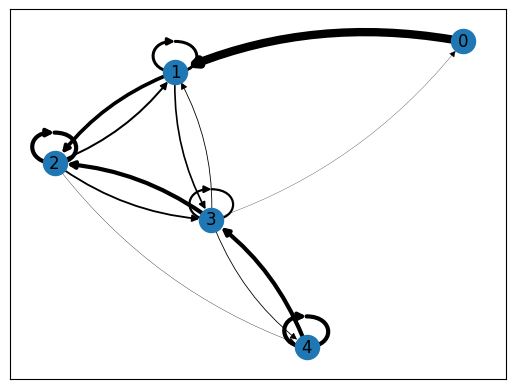

In [30]:
import networkx as nx
def draw_transition_graph(P):
    # construct a directed graph directly from the matrix
    graph = nx.DiGraph(P)
    # draw it in such a way that edges in both directions are visible and have appropriate width
    nx.draw_networkx(graph,connectionstyle='arc3, rad = 0.15',width=[6*P[u,v] for u,v in graph.edges()])

draw_transition_graph(transition_P)

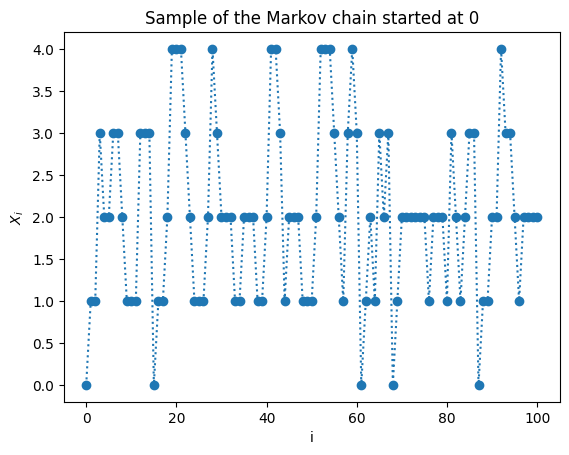

In [32]:
def sample_next(P,current):
    return rng.choice(len(P),p=P[current])

def sample_chain(P,start,n):
    chain = [start]
    for _ in range(n):
        chain.append(sample_next(P,chain[-1]))
    return chain

plt.plot(sample_chain(transition_P,0,100),linestyle=':', marker='o')
plt.xlabel("i")
plt.ylabel(r"$X_i$")
plt.title("Sample of the Markov chain started at 0")
plt.show()

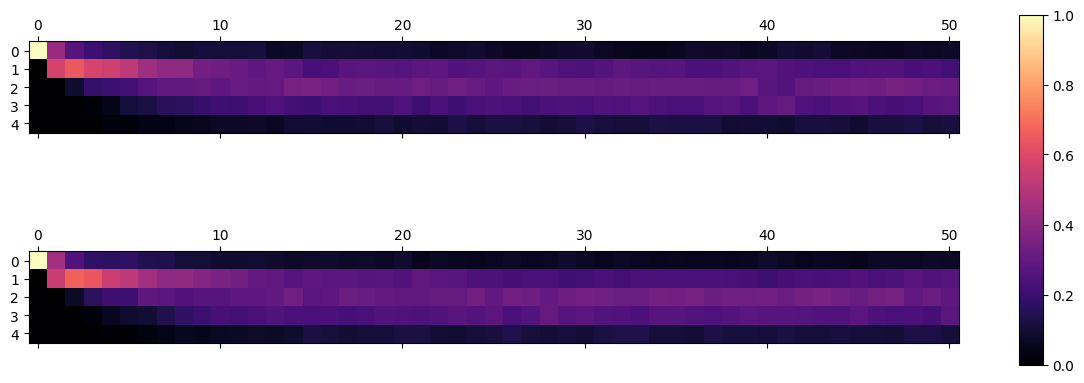

In [14]:
fig, ax = plt.subplots(2,1, figsize=(12, 5))

num_samples = 500
length = 50
starting_points = [0,0,1,0,0]

for i in range(2):
    chains = [sample_chain(transition_P,starting_points[i],length) for _ in range(num_samples)]
    distribution = np.apply_along_axis(lambda col: np.bincount(col,minlength=num_states)/num_samples, 0, chains)
    im = ax[i].matshow(distribution,cmap=plt.cm.magma)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [33]:
def stationary_distributions(P):
    eigenvalues, eigenvectors = np.linalg.eig(np.transpose(P))
    # make list of normalized eigenvectors for which the eigenvalue is very close to 1
    return [eigenvectors[:,i]/np.sum(eigenvectors[:,i]) for i in range(len(eigenvalues))
              if np.abs(eigenvalues[i]-1) < 1e-10]


print("Eigenvalues: ",np.linalg.eig(transition_P)[0])
for pi in stationary_distributions(transition_P):
    print("Stationary distribution: ",pi)

Eigenvalues:  [1.00000000e+00+0.j         5.23698783e-01+0.j
 1.42453930e-04+0.08029019j 1.42453930e-04-0.08029019j
 1.02683310e-01+0.j        ]
Stationary distribution:  [0.00830948-0.j 0.21704071-0.j 0.44028281-0.j 0.24928698-0.j
 0.08508002-0.j]


In [34]:
def markov_sample_mean(P,start,function,n):
    total = 0
    state = start
    for _ in range(n):
        state = sample_next(P,state)
        total += function[state]
    return total/n

# an example of a function specified as a vector
function = [i+1 for i in range(num_states)]
exact_expectation = np.dot(stationary_distributions(transition_P)[0],function)
print("E[f(X)] =",exact_expectation)
for n in [2**i for i in range(8,16)]:
    print("sample mean for n =",n,":",markov_sample_mean(transition_P,0,function,n))

E[f(X)] = (3.1857873462934956+0j)
sample mean for n = 256 : 3.3125
sample mean for n = 512 : 3.1484375
sample mean for n = 1024 : 3.177734375
sample mean for n = 2048 : 3.14599609375
sample mean for n = 4096 : 3.172607421875
sample mean for n = 8192 : 3.15869140625
sample mean for n = 16384 : 3.163330078125
sample mean for n = 32768 : 3.181365966796875


K3

In [79]:
n_steps = 20000
transition_matrix = transition_P
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2), p=transition_matrix[states[-1]]))
states = np.array(states)

K4

In [82]:
n_steps = 20000
transition_matrix = transition_P
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2, 3), p=transition_matrix[states[-1]]))
states = np.array(states)

K5

In [38]:
n_steps = 20000
transition_matrix = transition_P
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2, 3, 4), p=transition_matrix[states[-1]]))
states = np.array(states)

K6

In [88]:
n_steps = 20000
transition_matrix = transition_P
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2, 3, 4, 5), p=transition_matrix[states[-1]]))
states = np.array(states)

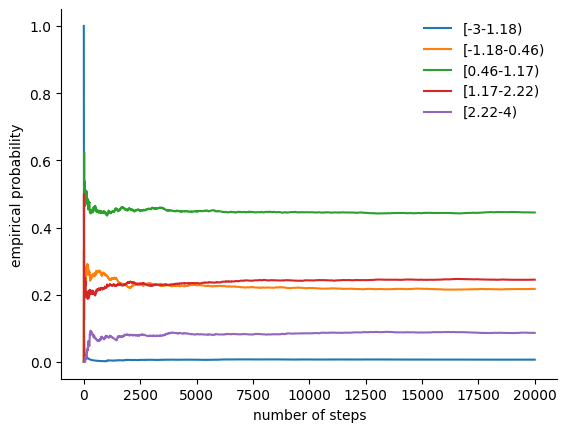

Last empirical probabilities for each state:
[-3-1.18): 0.0068013602720544105
[-1.18-0.46): 0.21739347869573913
[0.46-1.17): 0.4446889377875575
[1.17-2.22): 0.2447989597919584
[2.22-4): 0.08631726345269054


In [39]:

def despine(ax, spines=('top', 'left', 'right')):
    for spine in spines:
        ax.spines[spine].set_visible(False)

last_values = {}
fig, ax = plt.subplots()
width = 1000
offsets = range(1, n_steps, 5)
last_values = {}  # Dictionary to store the last values for each state

for i, label in enumerate(state_space):
    empirical_probs = [np.sum(states[:offset] == i) / offset for offset in offsets]
    ax.plot(offsets, empirical_probs, label=label)
    last_values[label] = empirical_probs[-1]  # Store the last value



ax.set_xlabel("number of steps")
ax.set_ylabel("empirical probability")
ax.legend(frameon=False)
despine(ax, ('top', 'right'))
plt.show()
# Print the last values
print("Last empirical probabilities for each state:")
for label, value in last_values.items():
    print(f"{label}: {value}")

# Prueba de Metropolis

In [40]:
def log_prob(x):
     return -0.5 * np.sum(x ** 2)

In [41]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize,
                             high=x + 0.5 * stepsize,
                             size=x.shape)

In [42]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

In [43]:
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    # here we determine whether we accept the new state or not:
    # we draw a random number uniformly from [0,1] and compare
    # it with the acceptance probability
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

In [44]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept

    acceptance_rate = n_accepted / float(n_total)

    return chain, acceptance_rate

In [45]:
chain, acceptance_rate = build_MH_chain(np.array([2.0]), 3.0, 10000, log_prob)
chain = [state for state, in chain]
print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state)
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.714
Last ten states of chain: -1.96936, -1.56349, -1.77130, -0.87974, -0.87974, 0.10302, 1.55843, 0.47855, 0.47855, 0.47855


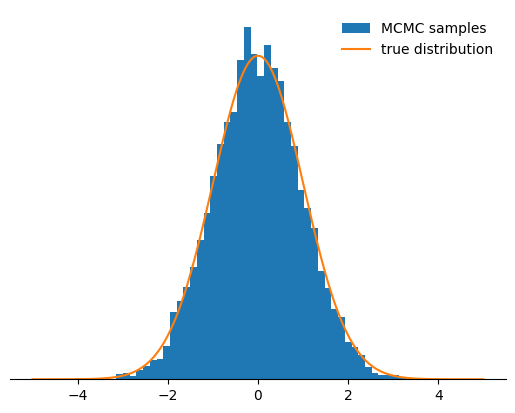

In [47]:
def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad

    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

fig, ax = plt.subplots()
plot_samples(chain[500:], log_prob, ax)
despine(ax)
ax.set_yticks(())
plt.show()

Acceptance rate: 0.105


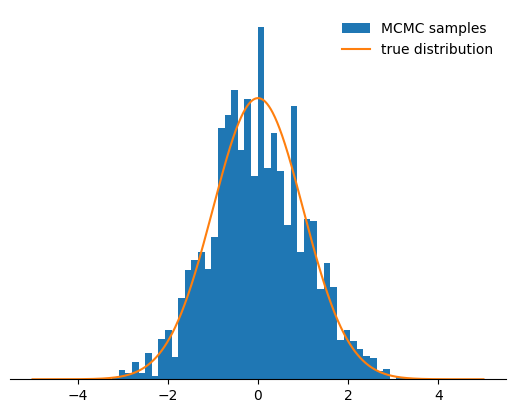

In [48]:
def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    despine(ax)
    ax.set_yticks(())
    plt.show()

sample_and_display(np.array([2.0]), 30, 10000, 500, log_prob)

Acceptance rate: 0.988


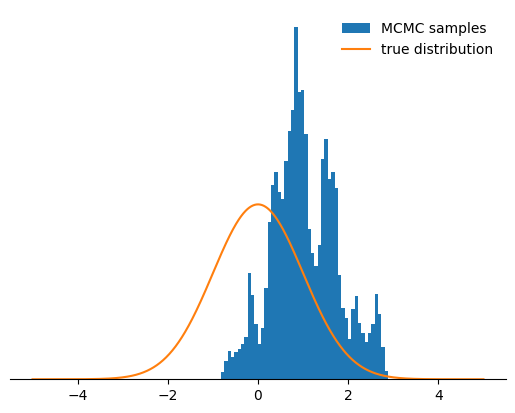

In [49]:
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)

Acceptance rate: 0.990


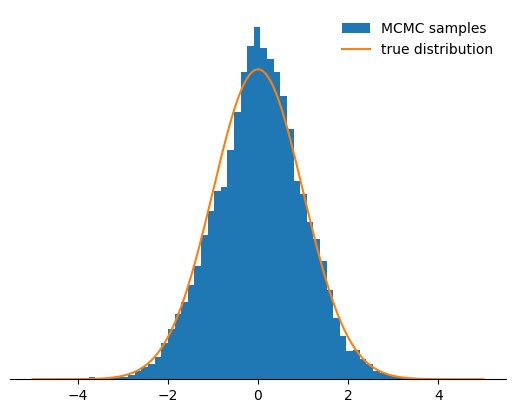

In [50]:
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)

# DBSCAN (Intento)

In [ ]:
#Librería DBSCAN
from sklearn.cluster import DBSCAN

#Librería para estandarizar
from sklearn.preprocessing import StandardScaler

In [ ]:
X_dist = StandardScaler().fit_transform(X)

In [ ]:
#Generamos el modelo, indicando el epsilon y el min_samples:
db = DBSCAN(eps=0.5, min_samples=100).fit(X)

In [ ]:
#Máscara con tamaño de los datos:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#Máscara con valores:
core_samples_mask[db.core_sample_indices_] = True
#Etiqueta de los datos (a qué cluster pertenecen):
labels = db.labels_

In [ ]:
# Número de clusters en las etiquetas ignorando el ruido presente
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
ruido = list(labels).count(-1)
print("Estimado número de cluster: ", num_clusters)
print("Estimado número de puntos ruidosos: ", ruido)

Estimado número de cluster:  0
Estimado número de puntos ruidosos:  117


Estimado número de clusters: 3
Estimado número de puntos ruidosos: 17


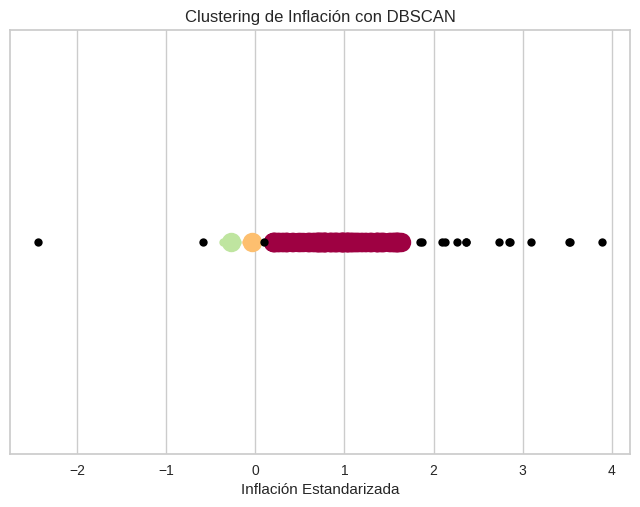

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Estandarización de los datos
X_dist = StandardScaler().fit_transform(X)

# Creación del modelo DBSCAN
db = DBSCAN(eps=0.1, min_samples=4).fit(X_dist)  # Ajusta estos parámetros según la distribución de tus datos

# Máscara para los puntos núcleo
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Etiquetas de los clusters
labels = db.labels_

# Número de clusters, excluyendo el ruido
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
ruido = list(labels).count(-1)

print("Estimado número de clusters:", num_clusters)
print("Estimado número de puntos ruidosos:", ruido)

# Configuración de colores para los gráficos
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Color negro para el ruido

    class_member_mask = labels == k

    # Puntos núcleo
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], [0] * len(xy), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Puntos no núcleo
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], [0] * len(xy), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Clustering de Inflación con DBSCAN')
plt.xlabel('Inflación Estandarizada')
plt.yticks([])
plt.show()


In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


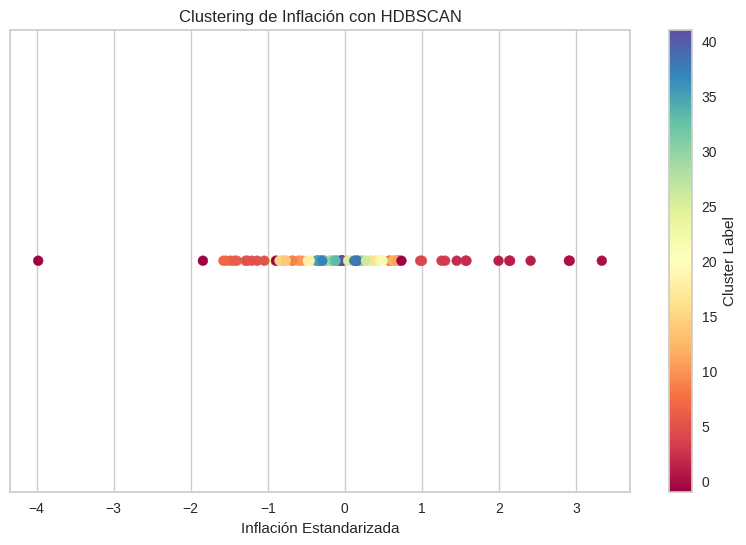

In [ ]:
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cargar tus datos de inflación
data = df1['Inflación'].values.reshape(-1, 1)

# Estandarizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Aplicar HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)  # Ajusta estos parámetros según necesites
cluster_labels = clusterer.fit_predict(data_normalized)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(data_normalized[:, 0], [0]*len(data_normalized), c=cluster_labels, cmap='Spectral', s=50)
plt.title('Clustering de Inflación con HDBSCAN')
plt.xlabel('Inflación Estandarizada')
plt.yticks([])  # No hay eje y significativo en datos unidimensionales
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
# Suponiendo que 'data_normalized' y 'cluster_labels' están definidos como antes

# Crear DataFrame para análisis
df_clusters = pd.DataFrame(X, columns=['Inflación'])
df_clusters['Cluster'] = cluster_labels

# Calcular estadísticas descriptivas para cada cluster
cluster_summary = df_clusters.groupby('Cluster')['Inflación'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

# Añadir rangos usando la media y la desviación estándar
cluster_summary['Lower Bound'] = cluster_summary['mean'] - cluster_summary['std']
cluster_summary['Upper Bound'] = cluster_summary['mean'] + cluster_summary['std']

print(cluster_summary)

    Cluster      mean       std   min   max  count  Lower Bound  Upper Bound
0        -1  0.233333  1.562826 -2.44  1.64      6    -1.329493     1.796160
1         0  3.646667  0.210792  3.52  3.89      3     3.435875     3.857459
2         1  2.882500  0.150416  2.73  3.09      4     2.732084     3.032916
3         2  2.330000  0.060828  2.26  2.37      3     2.269172     2.390828
4         3  2.110000  0.028284  2.09  2.13      2     2.081716     2.138284
5         4  1.860000  0.014142  1.85  1.87      2     1.845858     1.874142
6         5 -0.024000  0.085615 -0.11  0.10      5    -0.109615     0.061615
7         6 -0.243333  0.035119 -0.28 -0.21      3    -0.278452    -0.208214
8         7 -0.345000  0.021213 -0.36 -0.33      2    -0.366213    -0.323787
9         8  1.505000  0.007071  1.50  1.51      2     1.497929     1.512071
10        9  0.415000  0.007071  0.41  0.42      2     0.407929     0.422071
11       10  0.503333  0.025166  0.48  0.53      3     0.478167     0.528499